# Adquisición y preprocesamiento

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

files = os.listdir('d\\')

list_of_dfs = []
for file in files:
    with open(os.path.join('d\\',file), 'rb') as pickle_file:
        dictRaw = pd.read_pickle(pickle_file) 
        labels = dictRaw.get('labels')
        data = dictRaw.get('data')
        
        dfLabels = pd.DataFrame(data=labels, columns=["valence", "arousal", "dominance", "liking"])

        a,b,c = data.shape
        E = data.reshape(40, 322560)
        allData = pd.DataFrame(E).transpose()
        rows = list()
        for _,row in dfLabels.iterrows():
            rows += [row]*8064
        aux = pd.DataFrame(rows).reset_index(drop=True)
        allData = allData.merge(aux, left_index=True, right_index=True)
        
        list_of_dfs.append(allData)
data = pd.concat(list_of_dfs, ignore_index=True)

data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature','valence', 'arousal', 'dominance', 'liking']

data.drop(['hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature'],axis = 'columns', inplace=True)

data
# En data tenemos la información de todos los sujetos

,FP1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,F4,F8,AF4,Fp2,Fz,Cz,valence,arousal,dominance,liking
0,0.948232,10.260175,1.013050,-7.658428,-1.811108,11.011411,3.026008,-2.380048,3.978952,-9.657708,...,4.239575,4.888393,0.596471,0.589618,-2.276449,-0.109300,7.71,7.60,6.90,7.83
1,1.653335,12.795443,-1.067832,-3.267558,-4.783876,7.402976,2.676232,-3.614201,-1.434440,-0.906298,...,4.557239,6.007259,-1.881391,-4.831903,-1.739787,-6.518661,7.71,7.60,6.90,7.83
2,3.013726,10.426192,3.908249,0.701542,-0.522649,1.120469,2.046996,-4.286566,-6.174767,9.408599,...,0.636801,2.921478,-4.484906,-8.186728,0.555901,-11.727187,7.71,7.60,6.90,7.83
3,1.495061,8.229207,6.094405,2.959722,1.299854,-0.832024,2.192056,-5.170547,-6.571542,14.101073,...,-2.965047,-0.679860,-4.483488,-7.905437,-1.168129,-9.051847,7.71,7.60,6.90,7.83
4,-1.264836,3.751782,4.145906,3.459897,-0.916779,-0.784404,-4.694002,-5.332026,-7.793136,16.284187,...,3.248115,-1.103246,-2.547386,-4.419073,-1.319219,-4.072682,7.71,7.60,6.90,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322555,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.214036,-0.050429,...,-0.101962,0.036677,-0.007930,0.081379,-0.081538,-0.009341,5.10,7.12,6.17,5.97
322556,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.215036,-0.050429,...,-0.101962,0.036677,-0.007930,0.081379,-0.081538,-0.009341,5.10,7.12,6.17,5.97
322557,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.215036,-0.050429,...,-0.101962,0.036677,-0.007930,0.081379,-0.082538,-0.009341,5.10,7.12,6.17,5.97
322558,-0.097608,-0.062015,-0.151092,0.013060,-0.046585,-0.060403,0.149920,0.000826,0.214036,-0.050429,...,-0.101962,0.036677,-0.007930,0.081379,-0.081538,-0.009341,5.10,7.12,6.17,5.97


# Extracción de características

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Lectura mediante pandas
dictRaw = pd.read_pickle('d\\s01.dat')

labels = dictRaw.get('labels')

dfLabels = pd.DataFrame(data=labels, columns=["valence", "arousal", "dominance", "liking"])

data = dictRaw.get('data')

df_videos = {}
#Recorrido de cada una de las columnas de la tabla 3d, y guardado en una una lista de dataframes para cada uno de los videos.
for i in range(40):
    df_videos[i] = pd.DataFrame(data[i])
    df_videos[i] = df_videos[i].transpose()
    df_videos[i].columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature']
    df_videos[i].drop(['hEOG','vEOG','zEMG','tEMG','GSR','Respiration','PLethy','Temperature'],axis = 'columns', inplace=True)


In [222]:
# Array de 40 dataframes : los 40 videos
# df_videos

In [223]:
    # Frecuencia de muestreo
    fs = 128
    # Window
    window = "hann"
    # Length of each segment
    # nperseg = 256 por defecto
    # noverlap
    # Por defecto a None, if None : noverlap = nperseg / 2
    # [...]

    # Definicion de bandas
    eeg_bands = {'Delta': (1, 4),
                'Theta': (4, 8),
                'Alpha': (8, 14),
                'Beta': (14, 31),
                'Gamma': (31, 50)}



In [224]:
# FOURIER
import scipy
from scipy import signal

# SE COGE EL PRIMER VÍDEOS, Df_VIDEOS[0]
def do_stft(channel):
    # Array 
    x = df_videos[0][channel]

    # Array of the sample frequency, Array of the segment times, STFT of x
    f, t , Zxx = scipy.signal.stft(x, fs, window)

    #print(np.abs(Zxx))
    '''
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    '''
    return Zxx


In [225]:
# Array of the sample frequency, Array of the segment times, Spectogram of x
'''f, t , Sxx = scipy.signal.spectrogram(x, fs, window)

plt.pcolormesh(t, f, np.abs(Sxx), vmin=0, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()'''

"f, t , Sxx = scipy.signal.spectrogram(x, fs, window)\n\nplt.pcolormesh(t, f, np.abs(Sxx), vmin=0, shading='gouraud')\nplt.ylabel('Frequency [Hz]')\nplt.xlabel('Time [sec]')\nplt.show()"

In [226]:
#np.abs(Sxx)

In [227]:
#SEPARACION EN LAS DISTINTAS BANDAS DE FRECUENCIA

def make_bands(Zxx):
    #Obtener valores reales de STFT, solo positivos.
    values = np.absolute(Zxx)

    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(data), 1.0/fs)
    #print(fft_freq)

    # Obtención de cada una de las bandas de frecuencia
    eeg_band_fft = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = values[freq_ix]

    #print(eeg_band_fft)
    '''
    eeg_band_fft_means = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft_means[band] = np.mean(values[freq_ix])

    #print(eeg_band_fft_means)

    #Graficación de las medias de los datos
    df = pd.DataFrame(columns=['band', 'val'])
    df['band'] = eeg_bands.keys()
    df['val'] = [eeg_band_fft_means[band] for band in eeg_bands]
    ax = df.plot.bar(x='band', y='val', legend=False)
    ax.set_xlabel("EEG band")
    ax.set_ylabel("Mean band Amplitude")
    '''
    #print(df)

    #print("\n\n")

    '''
    print("Shape de Zxx: ", Zxx.shape)
    print("Shape de Delta: ", eeg_band_fft['Delta'].shape)
    print("Shape de Theta: ", eeg_band_fft['Theta'].shape)
    print("Shape de Alpha: ", eeg_band_fft['Alpha'].shape)
    print("Shape de Beta: ", eeg_band_fft['Beta'].shape)
    print("Shape de Gamma: ", eeg_band_fft['Gamma'].shape)
    '''
    return eeg_band_fft


In [228]:
# Ahora hay que hacer las medias sobre cada banda de frecuencia. La media entre cada una de las posiciones de los bloques. Hacer la media entre todas las posiciones 0, 1, 2... 63 de cada uno de los bloques
import numpy as np

def channel_freq(eeg_band_fft):
        
        freq = np.zeros((5, 64))        # 5 bandas, 64 posiciones de los datos

        # Se va a recorrer {Delta, Theta, Alpha, Beta, Gamma}
        for band in eeg_bands:

                # Para cada una de las 64 posiciones del array
                for j in range (0, 64):
                        
                        val = []
                        # Se va a recorrer cada uno de los arrays que hay en cada una de las bandas
                        for i in range (0, len(eeg_band_fft[band])):
                                val.append(eeg_band_fft[band][i][j])
                                # Ejemplo : eeg_band_fft['Delta'][0][0*0 + 0]
                        if (band == "Delta"):
                                freq[0][j] = np.mean(val)
                        elif (band == "Theta"):
                                freq[1][j] = np.mean(val)
                        elif (band == "Alpha"):
                                freq[2][j] = np.mean(val)
                        elif (band == "Beta"):
                                freq[3][j] = np.mean(val)
                        elif (band == "Gamma"):
                                freq[4][j] = np.mean(val)
        return(freq)     # En freq tenemos las frecuencias medias de cada una de las bandas

# Recordamos : Estamos tratando los datos relativos al video 0, un canal concreto de un sujeto concreto

In [229]:
# Obtener la división por bandas de frecuencia de cada uno de los canales del video 0

delta_bands = []
theta_bands = []
beta_bands = []
alpha_bands = []
gamma_bands = []

for channel in ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']:
    Zxx = do_stft(channel)
    eeg_band_fft = make_bands(Zxx)
    print(channel)
    print(eeg_band_fft)
    freq = channel_freq(eeg_band_fft)

    delta_bands.append(freq[0])
    theta_bands.append(freq[1])
    alpha_bands.append(freq[2])
    beta_bands.append(freq[3])
    gamma_bands.append(freq[4])
    
    print(freq)
    print("\n\n")
# En freq tenemos la media de todas las bandas de frecuencia de cada uno de los canales del vídeo 0

FP1
{'Delta': array([[0.03125961, 0.01418281, 0.01348112, 0.01378579, 0.01469746,
        0.01443953, 0.01425296, 0.01263113, 0.01397369, 0.01451922,
        0.01426573, 0.01393247, 0.01322193, 0.01424008, 0.01380862,
        0.01392914, 0.01445673, 0.01373135, 0.01318908, 0.01442272,
        0.0138455 , 0.01371866, 0.0143189 , 0.01339564, 0.01413206,
        0.01462173, 0.01336274, 0.01385723, 0.01458589, 0.01421656,
        0.01381159, 0.01379007, 0.01462855, 0.01425302, 0.01368349,
        0.01382166, 0.01382287, 0.01455632, 0.01334346, 0.01349421,
        0.01466362, 0.01351342, 0.01355927, 0.01462959, 0.01417446,
        0.01304662, 0.01380698, 0.01480431, 0.01437358, 0.01318529,
        0.01366446, 0.01456835, 0.01382987, 0.01404295, 0.01369235,
        0.01365888, 0.01472858, 0.01415814, 0.01409636, 0.01381185,
        0.01345657, 0.01431527, 0.01410267, 0.00882465]]), 'Theta': array([[2.85240827e-02, 2.81901450e-04, 5.81046471e-04, 2.27197701e-04,
        8.52113002e-04, 5.9934

In [230]:
# Banda delta
df = pd.DataFrame(delta_bands)
delta_df = df.transpose()
delta_df.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']
delta_df

rows = list()
for _,row in delta_df.iterrows():
    rows += [row]*40
aux_delta = pd.DataFrame(rows).reset_index(drop=True)

aux_delta

,FP1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
1,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
2,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
3,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
4,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2556,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2557,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2558,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265


In [231]:
# Banda theta
df = pd.DataFrame(theta_bands)
theta_df = df.transpose()
theta_df.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']
theta_df

rows = list()
for _,row in delta_df.iterrows():
    rows += [row]*40
aux_theta = pd.DataFrame(rows).reset_index(drop=True)

aux_theta

,FP1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
1,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
2,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
3,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
4,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2556,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2557,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2558,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265


In [232]:
#Bnada alpha
df = pd.DataFrame(alpha_bands)
alpha_df = df.transpose()
alpha_df.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']
alpha_df

rows = list()
for _,row in delta_df.iterrows():
    rows += [row]*40
aux_alpha = pd.DataFrame(rows).reset_index(drop=True)

aux_alpha

,FP1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
1,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
2,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
3,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
4,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2556,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2557,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2558,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265


In [233]:
# Banda beta
df = pd.DataFrame(beta_bands)
beta_df = df.transpose()
beta_df.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']
beta_df

rows = list()
for _,row in delta_df.iterrows():
    rows += [row]*40
aux_beta = pd.DataFrame(rows).reset_index(drop=True)

aux_beta

,FP1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
1,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
2,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
3,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
4,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2556,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2557,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2558,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265


In [234]:
# Banda gamma
df = pd.DataFrame(gamma_bands)
gamma_df = df.transpose()
gamma_df.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz']
gamma_df

rows = list()
for _,row in delta_df.iterrows():
    rows += [row]*40
aux_gamma = pd.DataFrame(rows).reset_index(drop=True)

aux_gamma

,FP1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
1,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
2,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
3,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
4,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.036610,0.020287,0.074248,0.029771,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2556,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2557,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265
2558,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.029538,0.027287,0.002806,0.039785,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265


In [235]:
df_labels = pd.DataFrame(data=labels, columns=["valence", "arousal", "dominance", "liking"])
rows = list()
for _,row in dfLabels.iterrows():
    rows += [row]*64
aux_labels = pd.DataFrame(rows).reset_index(drop=True)

aux_labels

,valence,arousal,dominance,liking
0,7.71,7.60,6.90,7.83
1,7.71,7.60,6.90,7.83
2,7.71,7.60,6.90,7.83
3,7.71,7.60,6.90,7.83
4,7.71,7.60,6.90,7.83
...,...,...,...,...
2555,5.10,7.12,6.17,5.97
2556,5.10,7.12,6.17,5.97
2557,5.10,7.12,6.17,5.97
2558,5.10,7.12,6.17,5.97


# En este punto lo que hemos hecho ha sido reducir de una matriz (40 videos x 40 canales x 8064) datos que teníamos al principio a (40 videos x 32 canales x 64 datos) para cada una de las bandas

In [236]:
data_delta = aux_delta.merge(aux_labels, left_index=True, right_index=True)
data_theta = aux_theta.merge(aux_labels, left_index=True, right_index=True)
data_alpha = aux_alpha.merge(aux_labels, left_index=True, right_index=True)
data_beta = aux_beta.merge(aux_labels, left_index=True, right_index=True)
data_gamma = aux_gamma.merge(aux_labels, left_index=True, right_index=True)

In [237]:
data_delta

,FP1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,F4,F8,AF4,Fp2,Fz,Cz,valence,arousal,dominance,liking
0,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424,7.71,7.60,6.90,7.83
1,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424,7.71,7.60,6.90,7.83
2,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424,7.71,7.60,6.90,7.83
3,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424,7.71,7.60,6.90,7.83
4,0.031260,0.052561,0.071918,0.024139,0.018881,0.041480,0.037475,0.104569,0.063523,0.022136,...,0.049087,0.029030,0.014418,0.029343,0.065366,0.094424,7.71,7.60,6.90,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265,5.10,7.12,6.17,5.97
2556,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265,5.10,7.12,6.17,5.97
2557,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265,5.10,7.12,6.17,5.97
2558,0.008825,0.004926,0.004846,0.017472,0.035194,0.049071,0.007407,0.048919,0.029906,0.021854,...,0.060580,0.020511,0.032329,0.067640,0.055461,0.040265,5.10,7.12,6.17,5.97


# Vamos a analizar la columna de valence para cada una de las bandas

In [238]:
    data = data_delta.drop(['arousal', 'dominance', 'liking'], axis=1)
    data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

    data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','valence']

    from sklearn.model_selection import train_test_split

    copia = data.copy()

    y = copia[['valence']]

    x = copia.drop(columns=['valence'])

    # test_size = 0.2 --> 80% datos para entrenamiento, 25% para test
    # max_depth --> The deeper the tree, the more splits it has and it captures more information about the data. En este modelo, valores altos de max_depths tienden a 'overfit' los datos, lo comprobamos en el siguiente bloque
    xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 1)

    from sklearn.ensemble import RandomForestClassifier

    clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
    clf.fit(xTrain, yTrain)

    predict = clf.predict(xTest)

    from sklearn.metrics import accuracy_score

    acc1 = accuracy_score(yTest, predict)*100
    acc1

<ipython-input-238-a5da34c7504a>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


82.03125

In [239]:
    data = data_theta.drop(['arousal', 'dominance', 'liking'], axis=1)
    data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

    data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','valence']

    from sklearn.model_selection import train_test_split

    copia = data.copy()

    y = copia[['valence']]

    x = copia.drop(columns=['valence'])

    xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.1, random_state = 1)

    from sklearn.ensemble import RandomForestClassifier

    clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
    clf.fit(xTrain, yTrain)

    predict = clf.predict(xTest)

    from sklearn.metrics import accuracy_score

    accuracy_score(yTest, predict)

<ipython-input-239-8acca9389fd7>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


0.77734375

In [240]:
    data = data_alpha.drop(['arousal', 'dominance', 'liking'], axis=1)
    data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

    data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','valence']

    from sklearn.model_selection import train_test_split

    copia = data.copy()

    y = copia[['valence']]

    x = copia.drop(columns=['valence'])

    xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.15, random_state = 1)

    from sklearn.ensemble import RandomForestClassifier

    clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
    clf.fit(xTrain, yTrain)

    predict = clf.predict(xTest)

    from sklearn.metrics import accuracy_score

    accuracy_score(yTest, predict)

<ipython-input-240-4a3bcd7e4120>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7838541666666666

In [241]:
    data = data_beta.drop(['arousal', 'dominance', 'liking'], axis=1)
    data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

    data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','valence']

    from sklearn.model_selection import train_test_split

    copia = data.copy()

    y = copia[['valence']]

    x = copia.drop(columns=['valence'])

    xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.25, random_state = 1)

    from sklearn.ensemble import RandomForestClassifier

    clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
    clf.fit(xTrain, yTrain)

    predict = clf.predict(xTest)

    from sklearn.metrics import accuracy_score

    accuracy_score(yTest, predict)

<ipython-input-241-f8a53dc6e7f0>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8109375

In [242]:
    data = data_gamma.drop(['arousal', 'dominance', 'liking'], axis=1)
    data['valence'] = np.where(data['valence'] >5, 'happy', 'sad')

    data.columns = ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz','valence']

    from sklearn.model_selection import train_test_split

    copia = data.copy()

    y = copia[['valence']]

    x = copia.drop(columns=['valence'])

    xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 1)

    from sklearn.ensemble import RandomForestClassifier

    clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
    clf.fit(xTrain, yTrain)

    predict = clf.predict(xTest)

    from sklearn.metrics import accuracy_score

    accuracy_score(yTest, predict)

<ipython-input-242-0c7fe522ef71>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


0.7760416666666666

# HACER UNA SELECCIÓN DE CARACTER´SITICAS, EN CONCRETO HAY QUE VER QUÉ CANALES SON LOS IMPORTANTES Y CUALES NO

# Se puede observar que de todas las pruebas, lo mejor ha sido usar el 80% de los datos para entrenamiento y 20% para tests


[0.00391467 0.0083378  0.00598583 0.01366581 0.00589421 0.06290823
 0.11995067 0.03233969 0.11493102 0.00939522 0.00886575 0.00342195
 0.         0.00175419 0.00031012 0.01445575 0.01862795 0.03885145
 0.05126241 0.         0.0673328  0.06960964 0.01907235 0.12062723
 0.0043602  0.01485543 0.0198625  0.04376099 0.06042947 0.01529767
 0.02540076 0.02451824]


<BarContainer object of 32 artists>

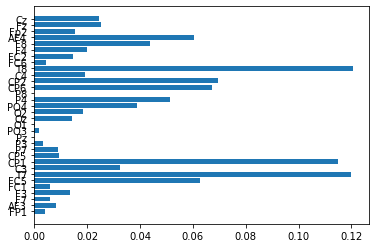

In [243]:
print(clf.feature_importances_)
plt.barh(['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz'], clf.feature_importances_)

In [244]:
importances = clf.feature_importances_
df_importances = pd.DataFrame(importances, ['FP1','AF3','F7','F3','FC1','FC5','T7','C3','CP1','CP5','P7','P3','Pz','PO3','O1','Oz','O2','PO4','P4','P8','CP6','CP2','C4','T8','FC6','FC2','F4','F8','AF4','Fp2','Fz','Cz'])
df_importances.columns = ['eeg']

In [245]:
res = df_importances.nlargest(8, 'eeg').index
res

Index(['T8', 'T7', 'CP1', 'CP2', 'CP6', 'FC5', 'AF4', 'P4'], dtype='object')

#  Construímos un DF con los canales que tienen más peso en el algoritmo de RandomForest

In [246]:
main_eeg = pd.DataFrame(data=data_delta, columns=['T8', 'CP1', 'T7', 'FC5', 'CP6', 'CP2', 'AF4', 'P4', 'valence'])
main_eeg

,T8,CP1,T7,FC5,CP6,CP2,AF4,P4,valence
0,0.020287,0.063523,0.037475,0.041480,0.085734,0.095671,0.014418,0.066028,7.71
1,0.020287,0.063523,0.037475,0.041480,0.085734,0.095671,0.014418,0.066028,7.71
2,0.020287,0.063523,0.037475,0.041480,0.085734,0.095671,0.014418,0.066028,7.71
3,0.020287,0.063523,0.037475,0.041480,0.085734,0.095671,0.014418,0.066028,7.71
4,0.020287,0.063523,0.037475,0.041480,0.085734,0.095671,0.014418,0.066028,7.71
...,...,...,...,...,...,...,...,...,...
2555,0.027287,0.029906,0.007407,0.049071,0.013743,0.008098,0.032329,0.019266,5.10
2556,0.027287,0.029906,0.007407,0.049071,0.013743,0.008098,0.032329,0.019266,5.10
2557,0.027287,0.029906,0.007407,0.049071,0.013743,0.008098,0.032329,0.019266,5.10
2558,0.027287,0.029906,0.007407,0.049071,0.013743,0.008098,0.032329,0.019266,5.10


In [247]:
    main_eeg['valence'] = np.where(main_eeg['valence'] >5, 'happy', 'sad')

    from sklearn.model_selection import train_test_split

    copia = main_eeg.copy()

    y = copia[['valence']]

    x = copia.drop(columns=['valence'])

    xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 1)

    from sklearn.ensemble import RandomForestClassifier

    clf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1, n_jobs=5)
    clf.fit(xTrain, yTrain)

    predict = clf.predict(xTest)

    from sklearn.metrics import accuracy_score
    
    acc2 = accuracy_score(yTest, predict)*100
    acc2

<ipython-input-247-345efb67eada>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(xTrain, yTrain)
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:    0.0s finished


80.078125

In [248]:
acc1 - acc2

1.953125

# Observamos que con 8 canales sólo, la precisión disminuye en un 1.95%, cuando maxdepth = 2
# Cuando maxdepth == 3, la diferencia aumenta a un 3.52%, desde 87.109375 hasta 83.59375